Average number of words: 174.8695652173913
Average reading level: 3.591444600280505
Average number of sentences: 15.107994389901823
Average number of characters: 925.6465638148668


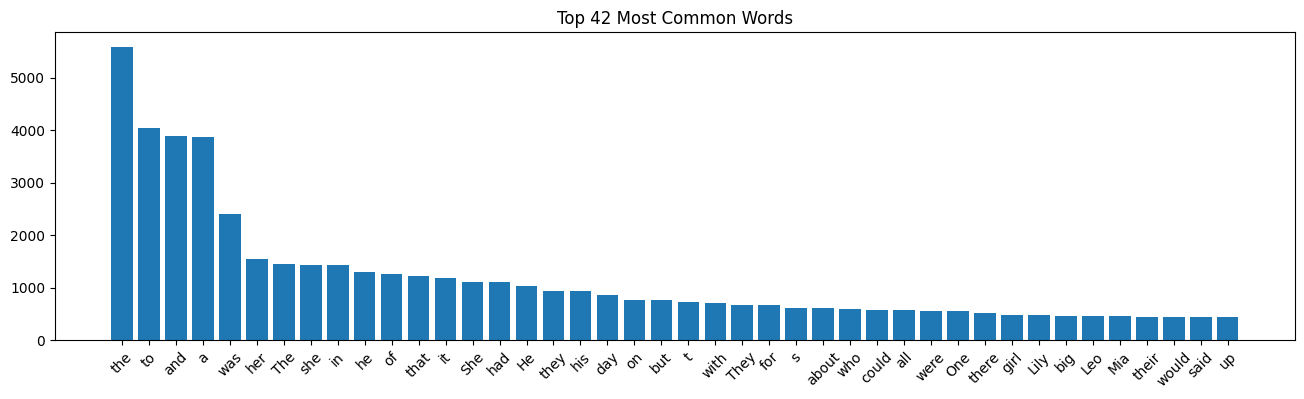

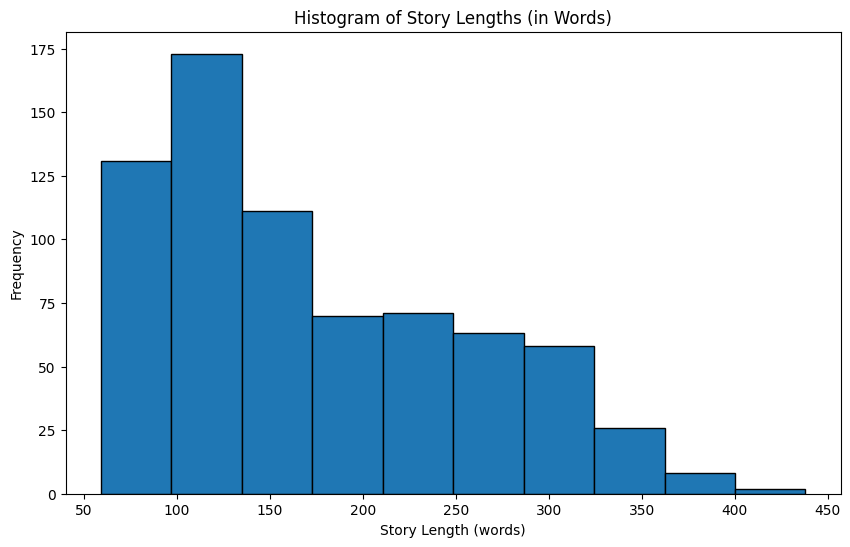

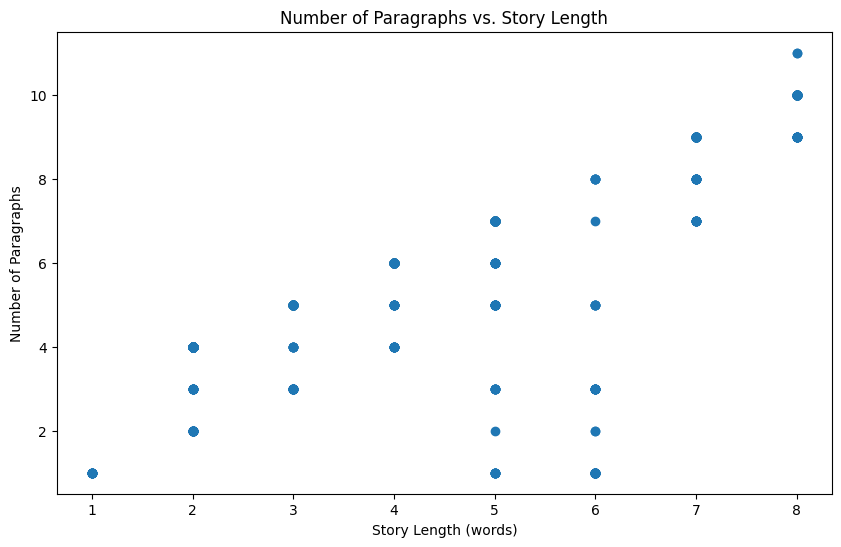

In [2]:
import json
import re
from collections import Counter
from statistics import mean
from textstat import flesch_kincaid_grade
import matplotlib.pyplot as plt

def read_jsonl_file(file_path):
    with open(file_path, 'r') as file:
        stories = [json.loads(line) for line in file]
    return stories

def analyze_story(story):
    num_characters = len(story)
    
    words = re.findall(r'\b\w+\b', story)
    num_words = len(words)
    
    sentences = re.split(r'[.!?]', story)
    num_sentences = len([s for s in sentences if s.strip()])
    
    paragraphs = story.split('\n\n')
    num_paragraphs = len(paragraphs)
    
    # Calculate average paragraph length (in words)
    avg_paragraph_length = num_words / num_paragraphs if num_paragraphs > 0 else 0
    
    # Calculate word frequency distribution
    word_freq = Counter(words)
    
    reading_level = flesch_kincaid_grade(story)
    
    return {
        'num_characters': num_characters,
        'num_words': num_words,
        'num_sentences': num_sentences,
        'num_paragraphs': num_paragraphs,
        'avg_paragraph_length': avg_paragraph_length,
        'word_freq': word_freq,
        'reading_level': reading_level
    }

# Compute Metrics for All Stories and Summarize
def compute_metrics(stories):
    all_metrics = []
    for story_data in stories:
        story_metrics = analyze_story(story_data['story'])
        story_metrics['id'] = story_data['id']
        story_metrics['expected_num_paragraphs'] = story_data['num_paragraphs']
        all_metrics.append(story_metrics)
    
    # Calculate overall averages
    avg_num_words = mean([m['num_words'] for m in all_metrics])
    avg_reading_level = mean([m['reading_level'] for m in all_metrics])
    avg_num_sentences = mean([m['num_sentences'] for m in all_metrics])
    avg_num_characters = mean([m['num_characters'] for m in all_metrics])

    print(f"Average number of words: {avg_num_words}")
    print(f"Average reading level: {avg_reading_level}")
    print(f"Average number of sentences: {avg_num_sentences}")
    print(f"Average number of characters: {avg_num_characters}")

    
    return all_metrics

# Visualize Word Distribution
def plot_word_distribution(metrics):
    all_words = Counter()
    for m in metrics:
        all_words.update(m['word_freq'])
    
    topk = 42
    most_common_words = all_words.most_common(topk)
    words, frequencies = zip(*most_common_words)
    
    plt.figure(figsize=(16, 4))
    plt.bar(words, frequencies)
    plt.xticks(rotation=45)
    plt.title(f"Top {topk} Most Common Words")
    plt.show()

# Plot Histogram of Story Length and Paragraphs vs Story Length
def plot_story_length_histogram(metrics):
    story_lengths = [m['num_words'] for m in metrics]
    
    plt.figure(figsize=(10, 6))
    plt.hist(story_lengths, bins=10, edgecolor='black')
    plt.title("Histogram of Story Lengths (in Words)")
    plt.xlabel("Story Length (words)")
    plt.ylabel("Frequency")
    plt.show()

def plot_paragraphs_vs_story_length(metrics):
    num_paragraphs = [m['expected_num_paragraphs'] for m in metrics]
    story_lengths = [m['num_words'] for m in metrics]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(story_lengths, num_paragraphs)
    plt.title("Number of Paragraphs vs. Story Length")
    plt.xlabel("Story Length (words)")
    plt.ylabel("Number of Paragraphs")
    plt.show()

def main():
    file_path = r'D:\simple_stories_generate\data\claude_100_stories.jsonl'  # Replace with your JSONL file path
    stories = read_jsonl_file(file_path)
    metrics = compute_metrics(stories)
    plot_word_distribution(metrics)
    plot_story_length_histogram(metrics)
    plot_paragraphs_vs_story_length(metrics)

if __name__ == "__main__":
    main()
